In [1]:
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
# The GPU id to use, "0" to  "7"
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [2]:
# Import Print function
from __future__ import print_function

In [3]:
# Add manual seed for deterministic results
import torch
torch.manual_seed(1)

# Set Constant Values
batch_size = 512
class_map = {
    'PLANE': 0,
    'CAR': 1,
    'BIRD': 2,
    'CAT': 3,
    'DEER': 4,
    'DOG': 5,
    'FROG': 6,
    'HORSE': 7,
    'SHIP': 8,
    'TRUCK': 9
}

# Enable or disable visualizations
show_summary = True
show_dataset_analyze = True

In [4]:
from woolly.utils import get_device

# Check GPU availability
use_cuda, device = get_device()

In [5]:
# Load test and train loaders
from woolly.dataset import get_cifar_loader
# Get transforme functions
from woolly.transform import get_a_train_transform, get_a_test_transform

# create train and test loaders with transforms
train_loader, test_loader = get_cifar_loader(get_a_train_transform(), get_a_test_transform(), batch_size=batch_size, use_cuda=use_cuda)

Files already downloaded and verified
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

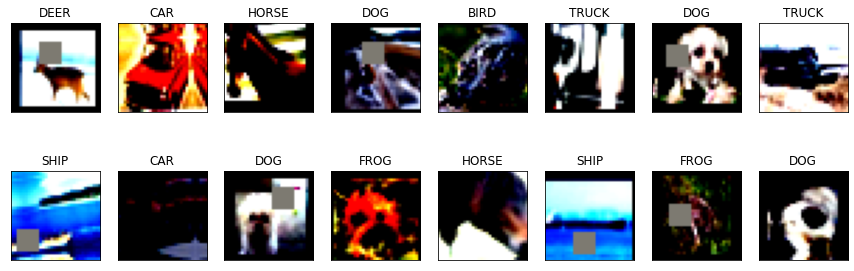

In [6]:
# We will now visualize DataSet by printing data scale and some samples
from woolly.visualize import print_class_scale, print_samples
if show_dataset_analyze:
    # print class scale
#     print_class_scale(train_loader, class_map)
    # print data samples
    print_samples(train_loader, class_map)

## Load and Train Network

1. Here we will first set all hyper parameters
2. Create instances for three different models
    1. Model with BatchNormalization and L1 Regularization
    2. Model with GroupNormalization
    3. Model with LayerNormalization
3. Print Model summary
4. Run training for all three model techniques

In [7]:
from woolly.model import WyCifar10Net
from woolly.backpropagation import train, test, get_sgd_optimizer
from woolly.utils import initialize_weights, print_modal_summary, print_summary
from woolly.scheduler import one_cycle_lr_pt, one_cycle_lr_custom
from woolly.training import Training

# Set Hyper Parameters Train Params
epochs = 30
lr = 0.05
max_lr = 0.5
steps_per_epoch = len(train_loader)
dropout = True
drop_ratio = 0.1
lambda_l1 = 1e-7
momentum = 0.9
weight_decay = 0.000125
weight_decay = weight_decay/batch_size

print("Using Device:", device)
print("Epochs:", epochs)
print("Lr:", lr)
print("Max Lr:", max_lr)
print("Batch Size:", batch_size)
print("Dropout:", dropout)
print("Dropout Ratio:", drop_ratio)
print("Momentum:", momentum)
print("Weight Decay:", weight_decay)


# Here we will do following
# 1. Create instances for three different models
#   a. Model with BatchNormalization

norm='bn'
ctrain = train()

# Create model instance based on parameter which one to use
model = WyCifar10Net(ctype='depthwise_seperable', use1x1=True, base_channels=16, layers=1, drop_ratio=drop_ratio).apply(initialize_weights).to(device)
# Create optimizer instance based on hyper parameters
optimizer = get_sgd_optimizer(model, lr=lr, momentum=momentum, weight_decay=weight_decay)

# Create Pytorch One Cycle scheduler instance
pytorch_scheduler = one_cycle_lr_pt(
    optimizer, 
    lr=lr, 
    max_lr=max_lr, 
    steps_per_epoch=steps_per_epoch, 
    epochs=epochs, 
    anneal_strategy='linear'
)

# Create Custom One Cycle schedule instance
custom_scheduler = one_cycle_lr_custom(
    optimizer, 
    lr=lr, 
    max_lr=max_lr, 
    steps_per_epoch=steps_per_epoch, 
    epochs=epochs, 
    anneal_strategy='linear'
)

# Create instance of trainer with all params
trainer = Training(
    model,
    optimizer,
    custom_scheduler,
    ctrain,
    test,
    train_loader,
    test_loader,
    lr,
    epochs,
    device,
    dropout
)

# Append all these instances of trainers 
trainer

if show_summary:
    print_summary(model, input_size=(3, 32, 32))
#     print_modal_summary(trainer.model)
# Run trainer
trainer.run()

Using Device: cuda
Epochs: 30
Lr: 0.05
Max Lr: 0.5
Batch Size: 512
Dropout: True
Dropout Ratio: 0.1
Momentum: 0.9
Weight Decay: 0.000125
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             864
          WyConv2d-2           [-1, 32, 32, 32]               0
       BatchNorm2d-3           [-1, 32, 32, 32]              64
            Conv2d-4           [-1, 32, 32, 32]           9,216
          WyConv2d-5           [-1, 32, 32, 32]               0
       BatchNorm2d-6           [-1, 32, 32, 32]              64
        WyResidual-7           [-1, 32, 32, 32]               0
            Conv2d-8           [-1, 32, 16, 16]             288
            Conv2d-9           [-1, 64, 16, 16]           2,048
         WyConv2d-10           [-1, 64, 16, 16]               0
      BatchNorm2d-11           [-1, 64, 16, 16]             128
           Conv2d-12          

## Analyze Network

We will print comparison between train and test accuries and incorrect predictions

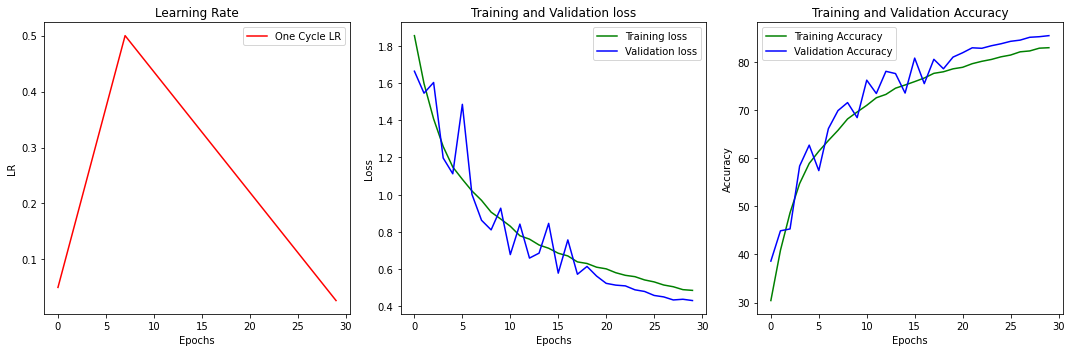

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Total Incorrect Predictions 1449


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


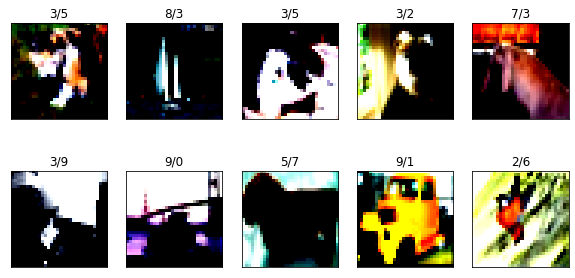

In [8]:
# Visualize network performance

from woolly.visualize import plot_network_performance
from woolly.utils import get_incorrrect_predictions
from woolly.visualize import plot_incorrect_predictions

from woolly.utils import get_all_predictions, get_incorrrect_predictions, prepare_confusion_matrix
from woolly.visualize import plot_confusion_matrix


#     trainer.print_best_model()
plot_network_performance(epochs, trainer.schedule, trainer.list_train_loss, trainer.list_valid_loss, trainer.list_train_correct, trainer.list_valid_correct)

#     all_preds, all_targets = get_all_predictions(trainer.model, test_loader, device)
#     confusion_matrix = prepare_confusion_matrix(all_preds, all_targets, class_map)
#     plot_confusion_matrix(confusion_matrix, class_map, False)

incorrect = get_incorrrect_predictions(trainer.model, test_loader, device)
plot_incorrect_predictions(incorrect, class_map)